### Student Information
Name: Emilien Jégou

Student ID: X1085036

GitHub ID: DunZzzz

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

# 1. Take home exercices

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [2]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [3]:
print(twenty_train.data[0:3])

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n', "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the proble

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X_sample = X.sample(n=1000) #random state

In [5]:
# create a new dataframe with given category
X.where(lambda x: x["category"] == 1).dropna()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1.0,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1.0,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1.0,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1.0,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1.0,comp.graphics
...,...,...,...
2232,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,1.0,comp.graphics
2236,From: dkusswur@falcon.depaul.edu (Daniel C. Ku...,1.0,comp.graphics
2241,From: dls@aeg.dsto.gov.au (David Silver) Subje...,1.0,comp.graphics
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1.0,comp.graphics


### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [6]:
X.where(lambda x: x["category_name"] == "comp.graphics").dropna().iloc[::10][:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1.0,comp.graphics
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1.0,comp.graphics
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1.0,comp.graphics
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1.0,comp.graphics
172,From: thinman@netcom.com (Technically Sweet) S...,1.0,comp.graphics


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [7]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

- the isnull methods didn't work because the values Not a Number, None and an empty string are representative of a null element whereas the string "None" or "NaN" are very clearly non empty string holding a word and thus is considered non null.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

The two changes that happend when using the sample are:
- the data get reduce to the specified length
- the rows will get choosen randomly and inserted in the dataframe in the same order (no sorting). 

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

In [8]:
s = X_sample.category_name.value_counts()

s.plot(kind = 'bar',
    title = 'Category distribution',
    ylim = [0, s.max() * 1.1], # we search for the maximum value in the plot and add a 10% margin to the top
    rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

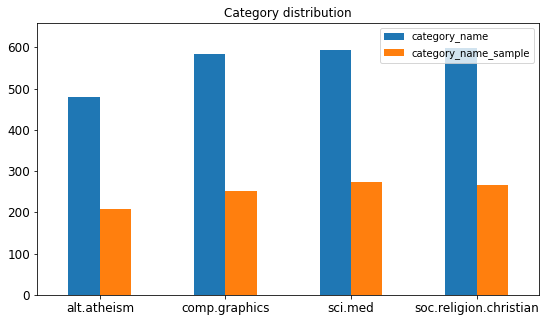

In [9]:
d = pd.DataFrame({
     'category_name': X.category_name.value_counts(),
     'category_name_sample': X_sample.category_name.value_counts(),
})

d.plot(kind = 'bar',
    title = 'Category distribution',
    ylim = [0, d.category_name.max() * 1.1],
    rot = 0, fontsize = 12, figsize = (9,5))

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()

In [11]:
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [12]:
import numpy as np

count_vect.get_feature_names()[np.where(X_counts[4, 0:100][0].toarray() == 1)[1][1]]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

Since most of the data is filled with zeros due to the sheer amount of term we would first need to trim the data in both axis, first I would sort the most meaningfull words using tfidf and use it as the x axis of the heatmap, then I would sort the documents by using the average tfidf of their words, and use it as the y axis.

This method would allow me to see if there is correlations between documents based on their most meaningfull words

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

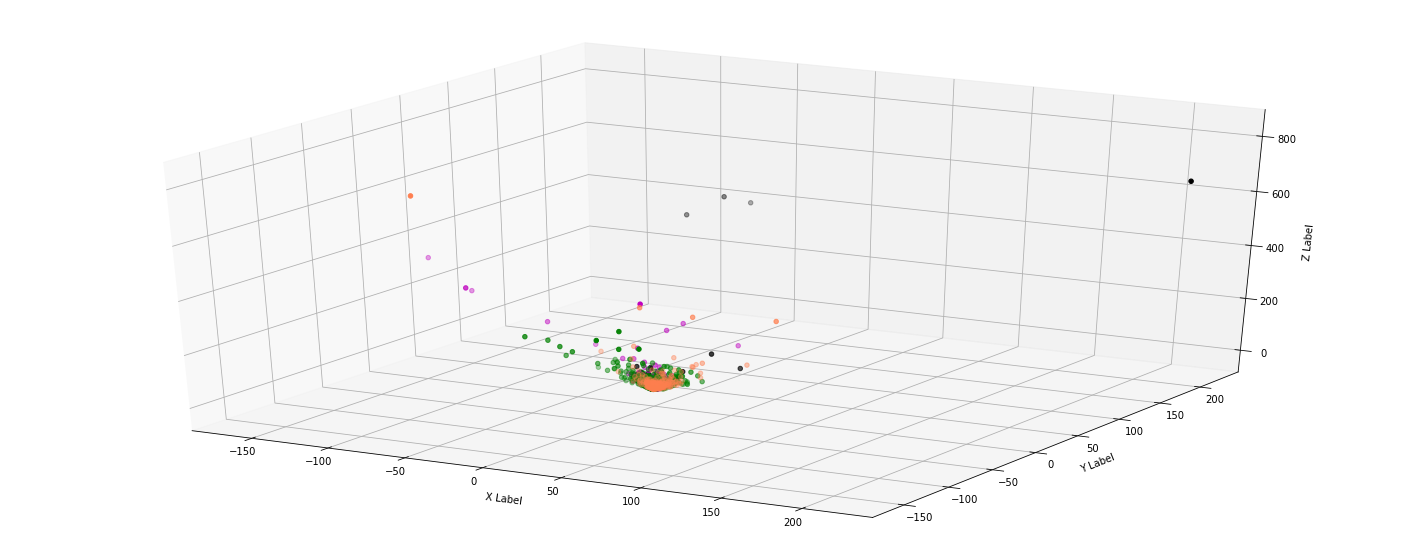

In [13]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# plot
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
fig = plt.figure(figsize = (25,10))
col = ['coral', 'green', 'black', 'm']

ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[2]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[0]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

We can observe in the example above that the x axis possess the greateast amount of outsider and that points of the plot seems to gather around the y axis. 

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


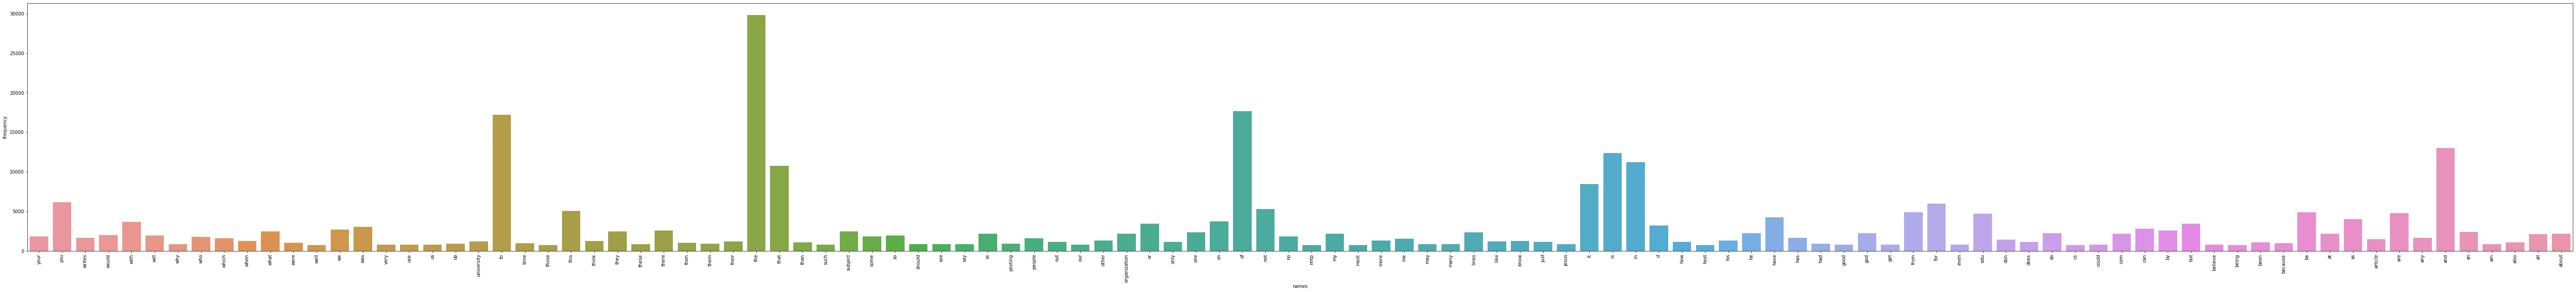

In [14]:
import seaborn as sns

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))

p = pd.DataFrame({
    "names": count_vect.get_feature_names(),
    "frequency": term_frequencies
})

x = p.where(lambda x: x["frequency"] > 700).dropna()

wx = x.sort_values(by='names', ascending=False).head(300)

g = sns.barplot(x=wx.names,
            y=wx.frequency)
g.set_xticklabels(wx.names, rotation = 90);


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

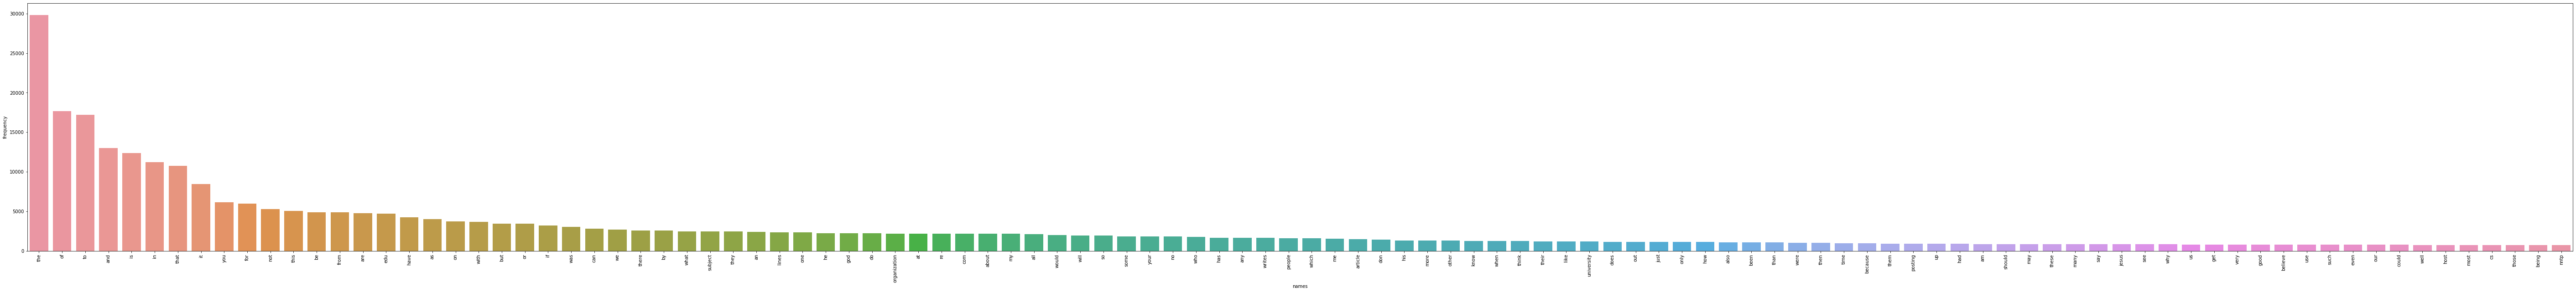

In [15]:

plt.subplots(figsize=(100, 10))

p = pd.DataFrame({
    "names": count_vect.get_feature_names(),
    "frequency": term_frequencies
})

wx = x.sort_values(by='frequency', ascending=False).head(300)

g = sns.barplot(x=wx.names,
            y=wx.frequency)
g.set_xticklabels(wx.names, rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [16]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)

mlb.transform(X['category_name']).tolist()

# it does work

[[0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1,

# 2. New Dataset

In [17]:
# importing every dataframes
amazon = pd.read_csv("s_label/amazon_cells_labelled.txt", header=None, names=[ "comment", "sentiment" ], sep="\t")
imdb = pd.read_csv("s_label/imdb_labelled.txt", header=None, names=[ "comment", "sentiment" ], sep="\t")
yelp = pd.read_csv("s_label/yelp_labelled.txt", header=None, names=[ "comment", "sentiment" ], sep="\t")

categories = [ "amazon", "yelp", "imdb" ];

amazon["category_name"] = "amazon"
amazon["category"] = 0

yelp["category_name"] = "yelp"
yelp["category"] = 1

imdb["category_name"] = "imdb"
imdb["category"] = 2

df = pd.DataFrame()

df = df.append(amazon, ignore_index=True)
df = df.append(yelp, ignore_index=True)
df = df.append(imdb, ignore_index=True)

df

,comment,sentiment,category_name,category
0,So there is no way for me to plug it in here i...,0,amazon,0
1,"Good case, Excellent value.",1,amazon,0
2,Great for the jawbone.,1,amazon,0
3,Tied to charger for conversations lasting more...,0,amazon,0
4,The mic is great.,1,amazon,0
...,...,...,...,...
2743,I just got bored watching Jessice Lange take h...,0,imdb,2
2744,"Unfortunately, any virtue in this film's produ...",0,imdb,2
2745,"In a word, it is embarrassing.",0,imdb,2
2746,Exceptionally bad!,0,imdb,2


In [18]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

comment          (The amoung of missing records is: , 0)
sentiment        (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
dtype: object

# Data exploration

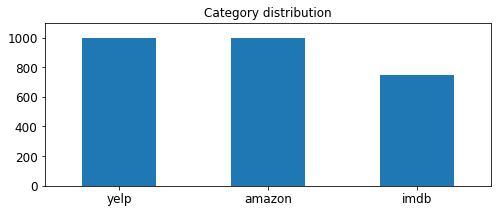

In [19]:
# Most prevalent category are yelp and amazon while imdb is slightly behind

import matplotlib.pyplot as plt
%matplotlib inline

s = df.category_name.value_counts()

s.plot(kind = 'bar',
    title = 'Category distribution',
    ylim = [0, s.max() * 1.1],
    rot = 0, fontsize = 12, figsize = (8,3))

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df["comment"])

occ = np.asarray(df_counts.sum(axis=0)).ravel().tolist()

counts_df = pd.DataFrame({
    'term': count_vect.get_feature_names(),
    'occurrences': occ
})

wx = counts_df.sort_values(by='occurrences', ascending=False).head(20)

wx[0:10] # 10 most used words

,term,occurrences
4531,the,1953
216,and,1138
2432,it,789
2427,is,754
4609,to,670
4558,this,643
3097,of,624
4968,was,571
2314,in,400
1829,for,336


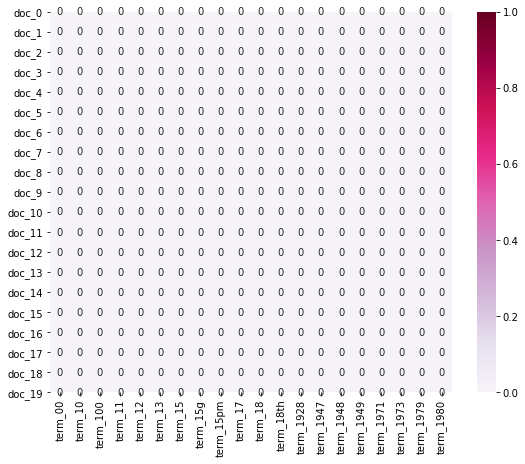

In [21]:
import seaborn as sns

# first twenty features only
plot_x = [ "term_" + str(i) for i in count_vect.get_feature_names()[0:20] ]
plot_y = [ "doc_" + str(i) for i in list(df.index)[0:20] ]
plot_z = df_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# we can see that the heatmap doesn't produce good results for this dataset

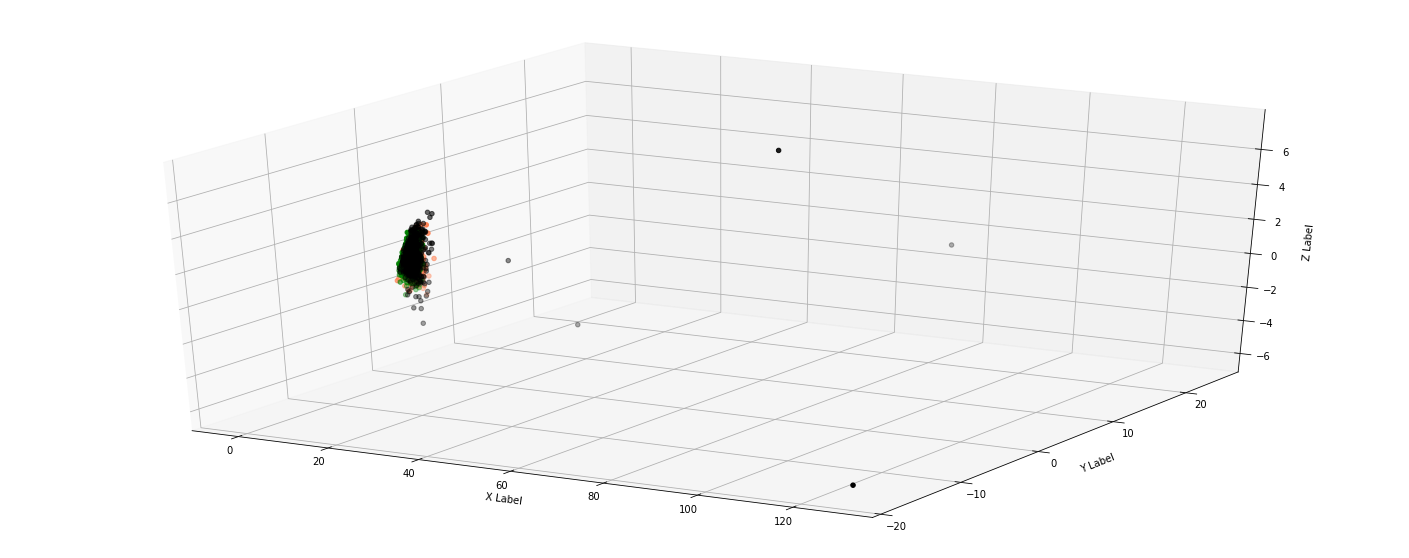

In [22]:
from mpl_toolkits.mplot3d import Axes3D 
# plot
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

fig = plt.figure(figsize = (25,10))
col = ['coral', 'green', 'black', 'm']

ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = df_reduced[df['category_name'] == category].T[0]
    ys = df_reduced[df['category_name'] == category].T[1]
    zs = df_reduced[df['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()


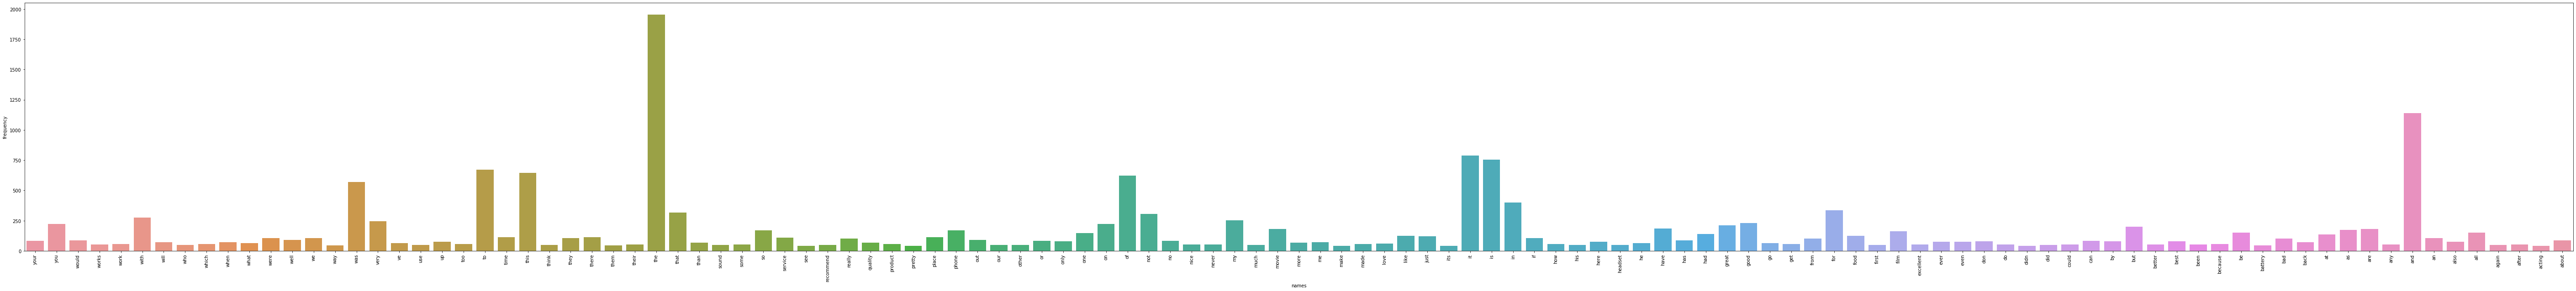

In [23]:
import seaborn as sns

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))

p = pd.DataFrame({
    "names": count_vect.get_feature_names(),
    "frequency": term_frequencies
})

# Words with over 40 uses in all the comments
x = p.where(lambda x: x["frequency"] > 40).dropna()

wx = x.sort_values(by='names', ascending=False)

g = sns.barplot(x=wx.names, y=wx.frequency)
g.set_xticklabels(wx.names, rotation = 90);


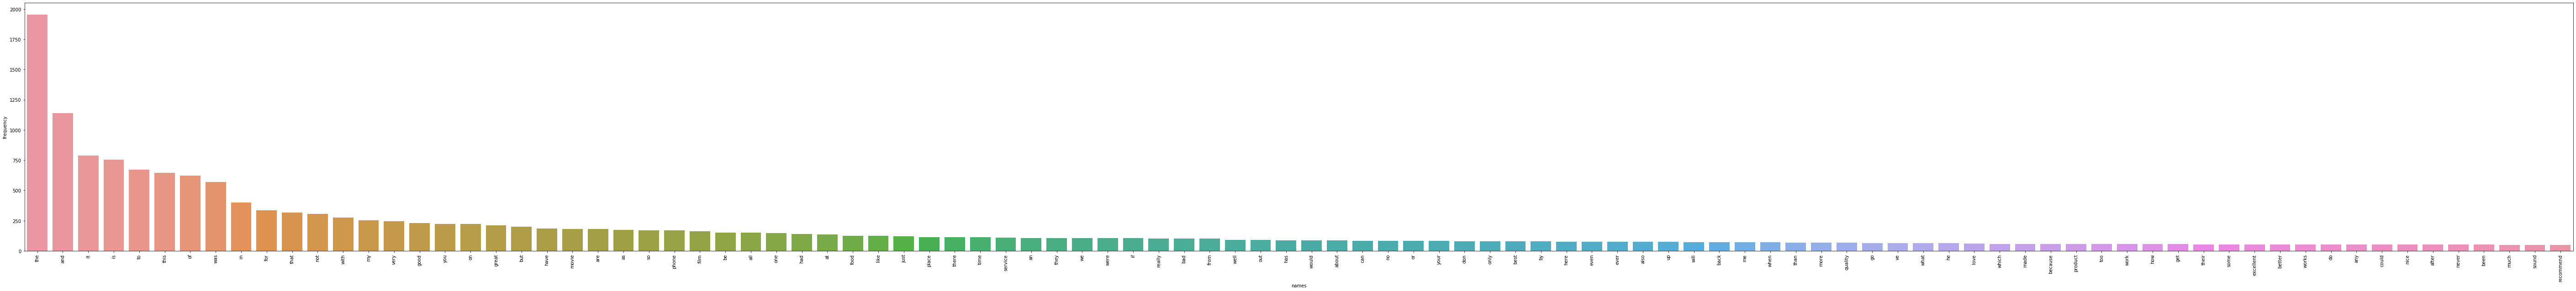

In [24]:
plt.subplots(figsize=(100, 10))

# The first 100 words sorted
wx = x.sort_values(by='frequency', ascending=False).head(100)

g = sns.barplot(x=wx.names,
            y=wx.frequency)
g.set_xticklabels(wx.names, rotation = 90);

In [25]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(df.category_name)

mlb.transform(df['category_name']).tolist()

# Categories are already sorted therefore the effect of one hot encoding is less visible in this case

[[1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1,

# 3. Tfidf Visualization

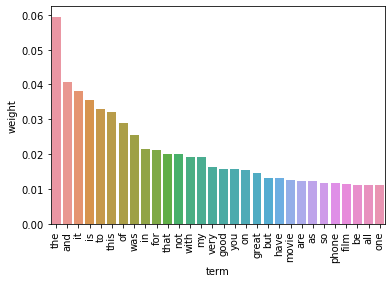

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(df_counts)

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()

# Tfidf on the text attributes of the new dataset
weights_df = pd.DataFrame({
    'feature': count_vect,
    'term': count_vect.get_feature_names(),
    'weight': weights
    }).sort_values(by='weight', ascending=False)

# 30 highest results
wdf30 = weights_df.head(30)

g = sns.barplot(x=wdf30.term,
            y=wdf30.weight)

g.set_xticklabels(wx.names, rotation = 90);

# 3.1 Naive Bayes Classifier

In [27]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

features_train, features_test, labels_train, labels_test = train_test_split(
    df.comment,
    df.sentiment,
    test_size=0.1,
    random_state=10)

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')

features_train = vectorizer.fit_transform(features_train)
features_test = vectorizer.transform(features_test)

vocabulary = vectorizer.get_feature_names()

pd.DataFrame(data=features_test.toarray(), columns=vocabulary)

from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(features_train, labels_train)

features_train = selector.transform(features_train).toarray()
features_test = selector.transform(features_test).toarray()

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(features_train, labels_train)
score_train = model.score(features_train, labels_train)
score_test = model.score(features_test, labels_test)

score_test = model.score(features_test, labels_test)

print("\nTrain set score:", score_train)
print("Test set score:", score_test)


Train set score: 0.8313788920339669
Test set score: 0.6836363636363636


In [28]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

features_train, features_test, labels_train, labels_test = train_test_split(
    df.comment,
    df.sentiment,
    test_size=0.1,
    random_state=10)

vectorizer = CountVectorizer(max_df=0.5, stop_words='english')

features_train = vectorizer.fit_transform(features_train)
features_test = vectorizer.transform(features_test)

vocabulary = vectorizer.get_feature_names()

pd.DataFrame(data=features_test.toarray(), columns=vocabulary)

from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(features_train, labels_train)

features_train = selector.transform(features_train).toarray()
features_test = selector.transform(features_test).toarray()

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(features_train, labels_train)
score_train = model.score(features_train, labels_train)
score_test = model.score(features_test, labels_test)

score_test = model.score(features_test, labels_test)

print("\nTrain set score:", score_train)
print("Test set score:", score_test)


Train set score: 0.7723412858875859
Test set score: 0.6254545454545455


We can observe that the Naive Bayes algorithm using the countvectorizer has a signifanctly lower score than the TFIDF one.

# 4. Lab

    In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

One of the part I think wasn't usefull was the heatmap due to the density of the data, heatmap is good at representing cluster of information and would be more usefull in the context of image recognition or topology exploration. heatmap could also be used to see if the data is uniformed to do that I might have tried to group the documents by sentiment and categories in the y axis and use the most meaningfull words (TFIDF) on the x axis.